<h4 align="center">Jian Sun</h4>
<h4 align="center">DUID: 873397832</h4>

# Content
- Introduction
- Model
- Result
  - PCA + KNN
  - MobileNet v2
  - LDA
- Discussion
- Future Work
- Appendix

# Introduction
This profect is to study facial expression recognition by affectNet, a first class facial expression dataset. And 3 models are selected to do this and their resutls are compared. Finally, we want to decide which method is best. In a meanwhile, we try to create an interactive environment for users. Therefore, users can input parameters at will for each step in every model. Here, we guess that the MobileNet v2 will bring us the best result.

# Model
## Dataset

The following is the table of categories and related image numbers from training and validation dataset.

Category       |       Number
---------------------|-------------------------
Neutral          |      75,374 
Happy           |      134,915 
Sad                |      25,959 
Surprise        |      14,590 
Fear               |      6,878 
Disgust         |      4,303 
Anger            |      25,382 
Contempt     |      4,250 
None             |      33,588 
Uncertain      |     12,145 
Non-Face      |     82,915 
Total              |     420,299 

During the study, we only take the first 8 categories to calculate.

## Structure
The system will present 4 choice, PCA+KNN, MobileNet v2 and LDA.

For each algorithm, we will start from training then validate the model with validation set, finally plot the heatmaps to show prediction results.

And for each method, actually we did twice. The first time we randomly choose 280000 or 10000 training image, but we get very worse results.

Then I consider how to solve this problem. I find that there are 75,374 Neutral images and 134,915 Happy images, which numbers are much more than the other categories. Perhaps, limiting the sample size of different categories may elevate the model performance. Next, I count the number of each category, and notice that Contempt has the least number, 3750. Therefore, I decide to use 3750 training images for each category.

# Result
## PCA + KNN

Initially, the training set is 280000, the validation set is 4000.

When K = 3, we get the best prediction, 0.2705 (There is printing error. The index I used here is i+1, I forget to minor 1. So it should be 3, not 5).

The average accuracy is 36.8%. This result is awful.

Then, using 3750 training images for each category, totally 30000 training images. When K =3, we get the best prediction, 0.218.

The average accuracy is 21.8%.

Populating the interactive namespace from numpy and matplotlib


(<matplotlib.axes._subplots.AxesSubplot at 0x1305d08d0>,
 <matplotlib.image.AxesImage at 0x131242828>)

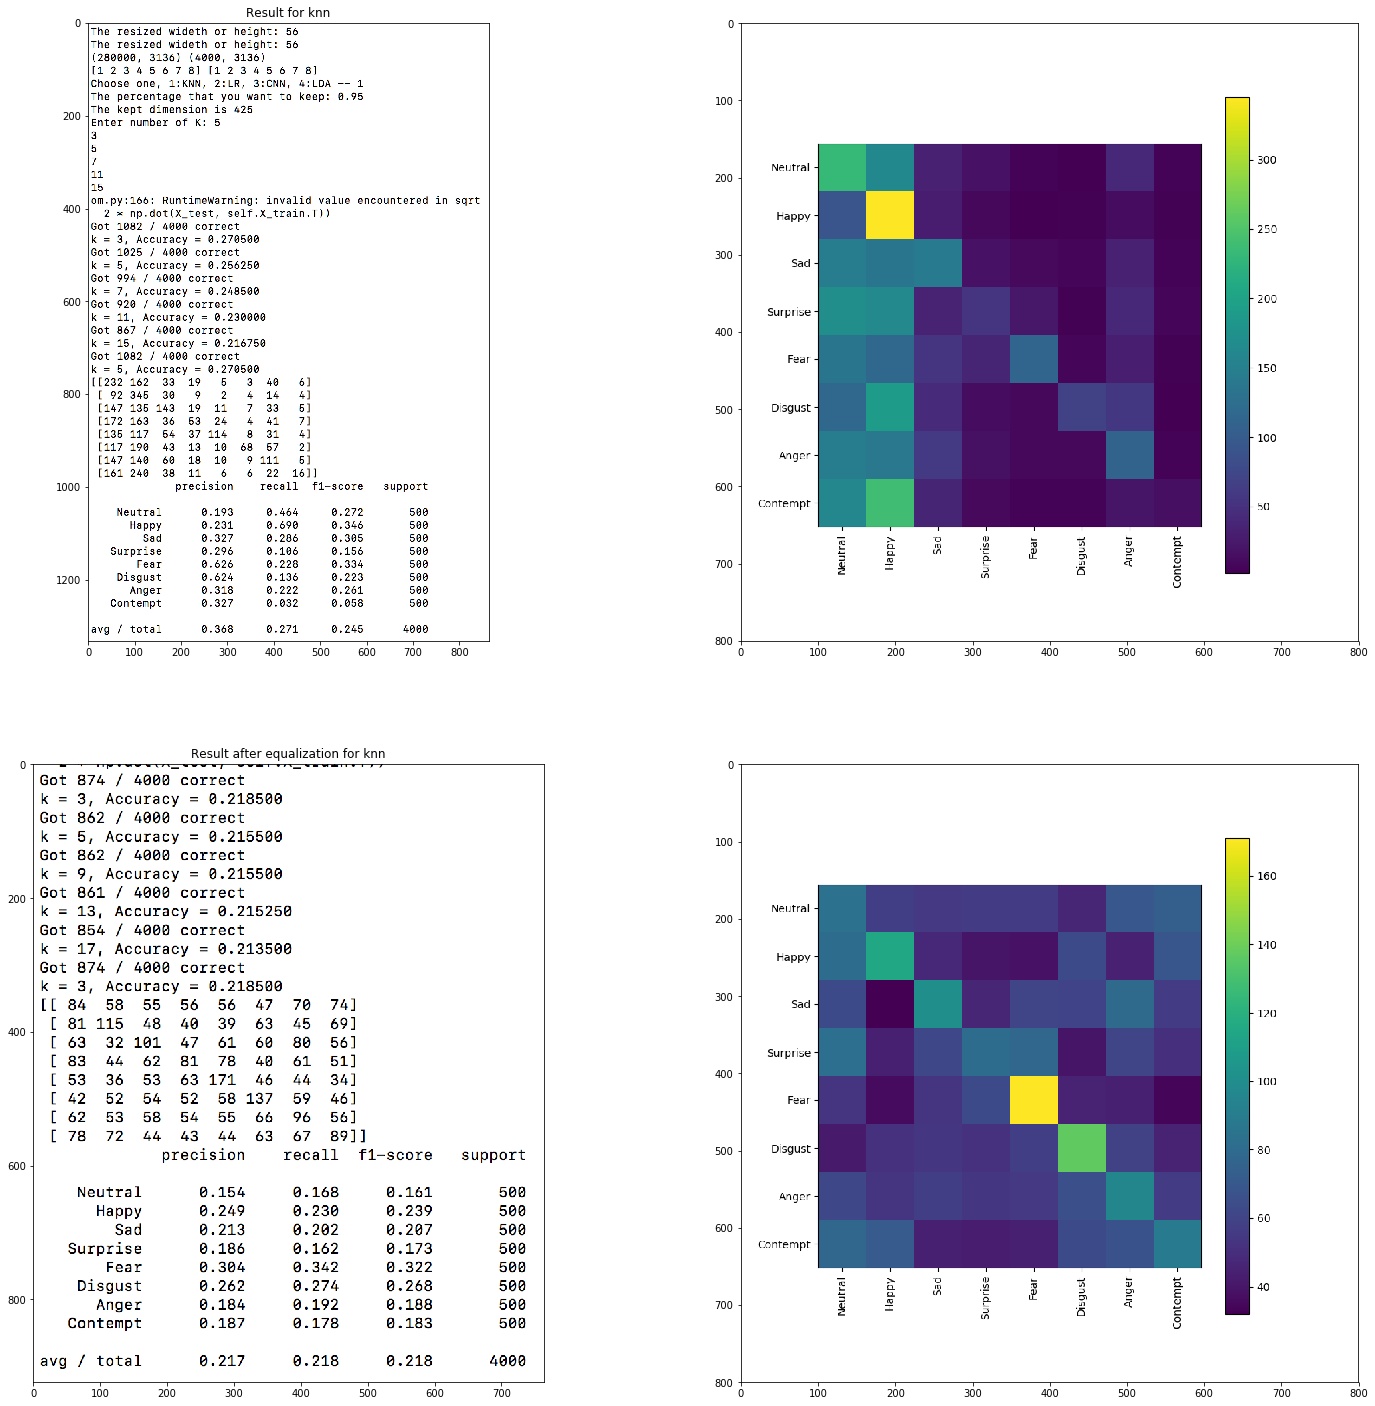

In [6]:
%pylab inline
import cv2
from matplotlib import pyplot as plt 
import matplotlib.image as mpimg
knn1 = cv2.imread('./KNN.png')
knn2 = mpimg.imread('plot_knn1.png')
knn3 = mpimg.imread('KNN2.png')
knn4 = mpimg.imread('plot_knn2.png')
plt.figure(figsize=(25,25))
plt.subplot(221),plt.imshow(knn1)
plt.title('Result for knn')
plt.subplot(222),plt.imshow(knn2)
plt.subplot(223),plt.imshow(knn3)
plt.title('Result after equalization for knn')
plt.subplot(224),plt.imshow(knn4)

## Mobilenet v2

The training set is 150000, the validation set is 4000.

The validation accuracy is 38.47%

Then, using 3750 training images for each category, totally 30000 training images.

The validation accuracy is 33.0%.

(<matplotlib.axes._subplots.AxesSubplot at 0x13f5e3860>,
 <matplotlib.image.AxesImage at 0x13f6317b8>)

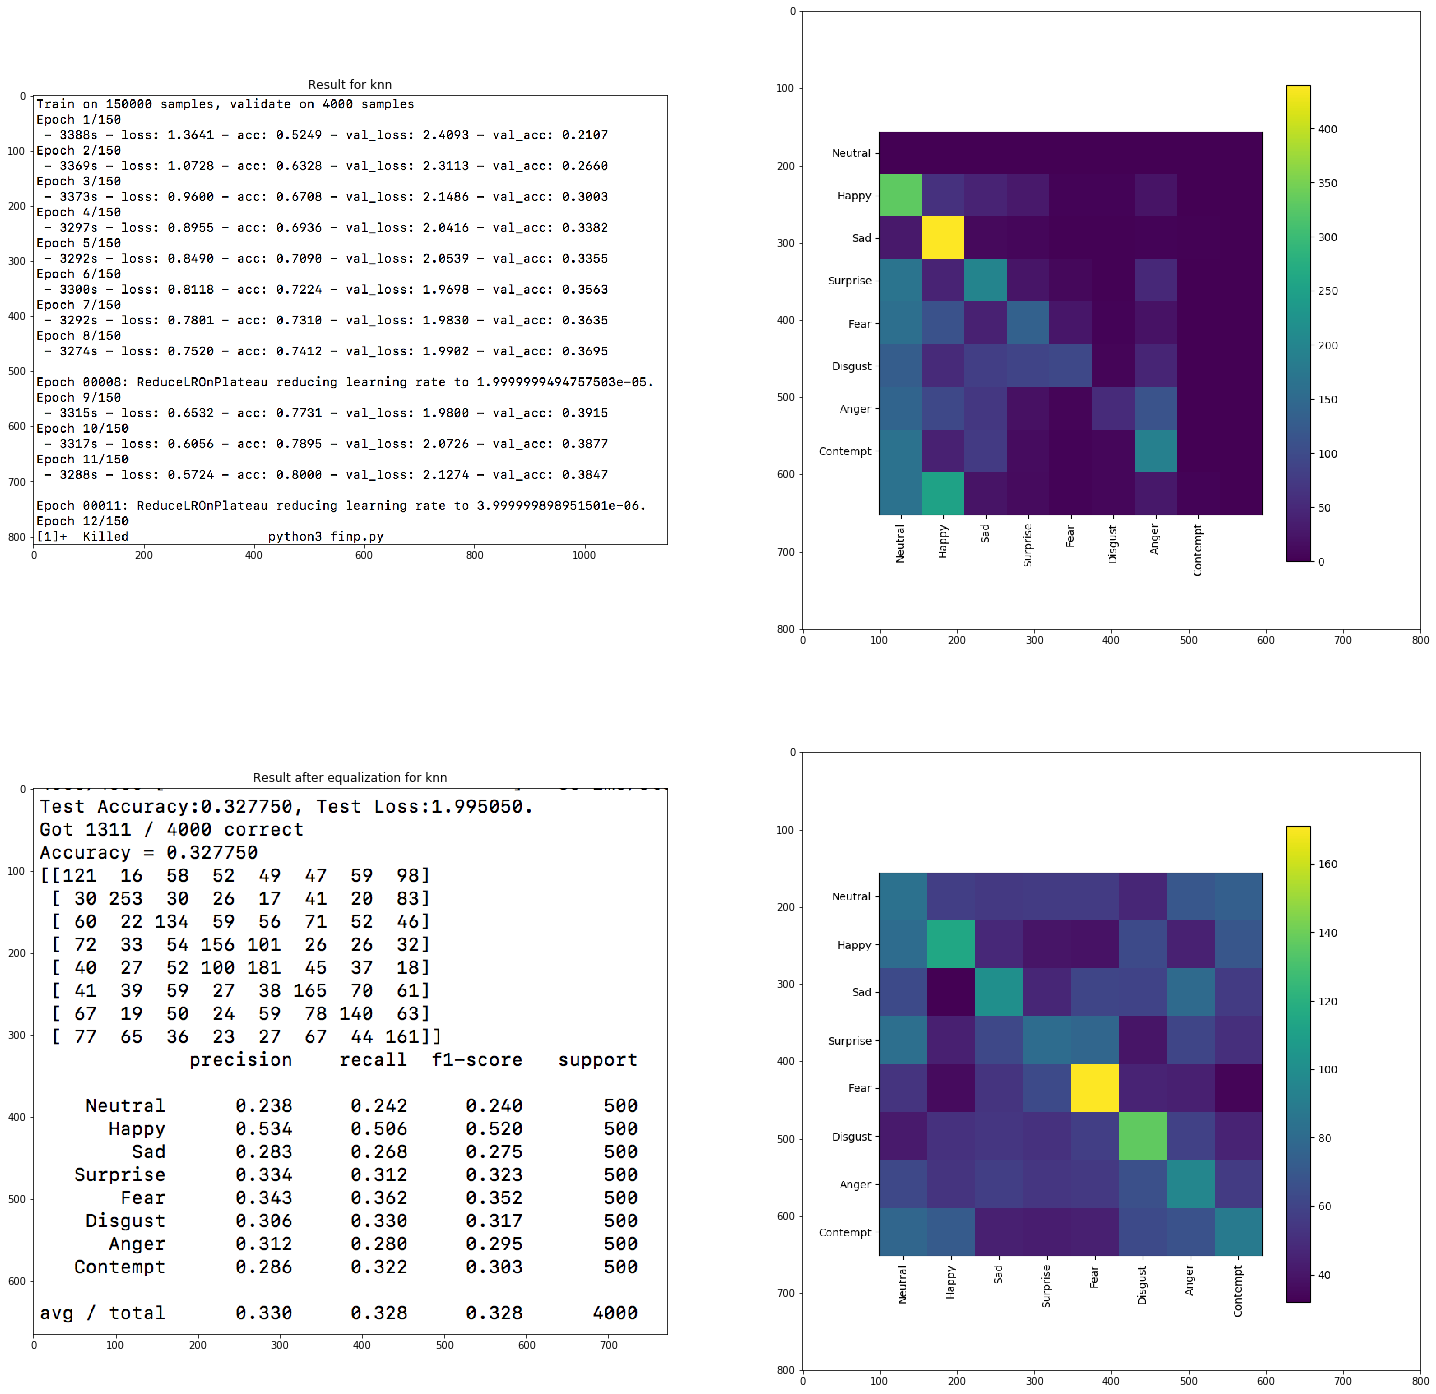

In [9]:
cnn1 = mpimg.imread('MBN1.png')
cnn2 = mpimg.imread('plot_cnn1.png')
cnn3 = mpimg.imread('MBN2.png')
cnn4 = mpimg.imread('plot_knn2.png')
plt.figure(figsize=(25,25))
plt.subplot(221),plt.imshow(cnn1)
plt.title('Result for knn')
plt.subplot(222),plt.imshow(cnn2)
plt.subplot(223),plt.imshow(cnn3)
plt.title('Result after equalization for knn')
plt.subplot(224),plt.imshow(cnn4)

## LDA

Initially, the training set is 100000, the validation set is 4000. We tried to use 280000 images to train, but there will be memory error, thus we shrink the size to 100000 images.

The average accuracy is 32.7%.

Then, using 3750 training images for each category, totally 30000 training images. 

The average accuracy is 27.2%.

(<matplotlib.axes._subplots.AxesSubplot at 0x1344c3780>,
 <matplotlib.image.AxesImage at 0x13450c6d8>)

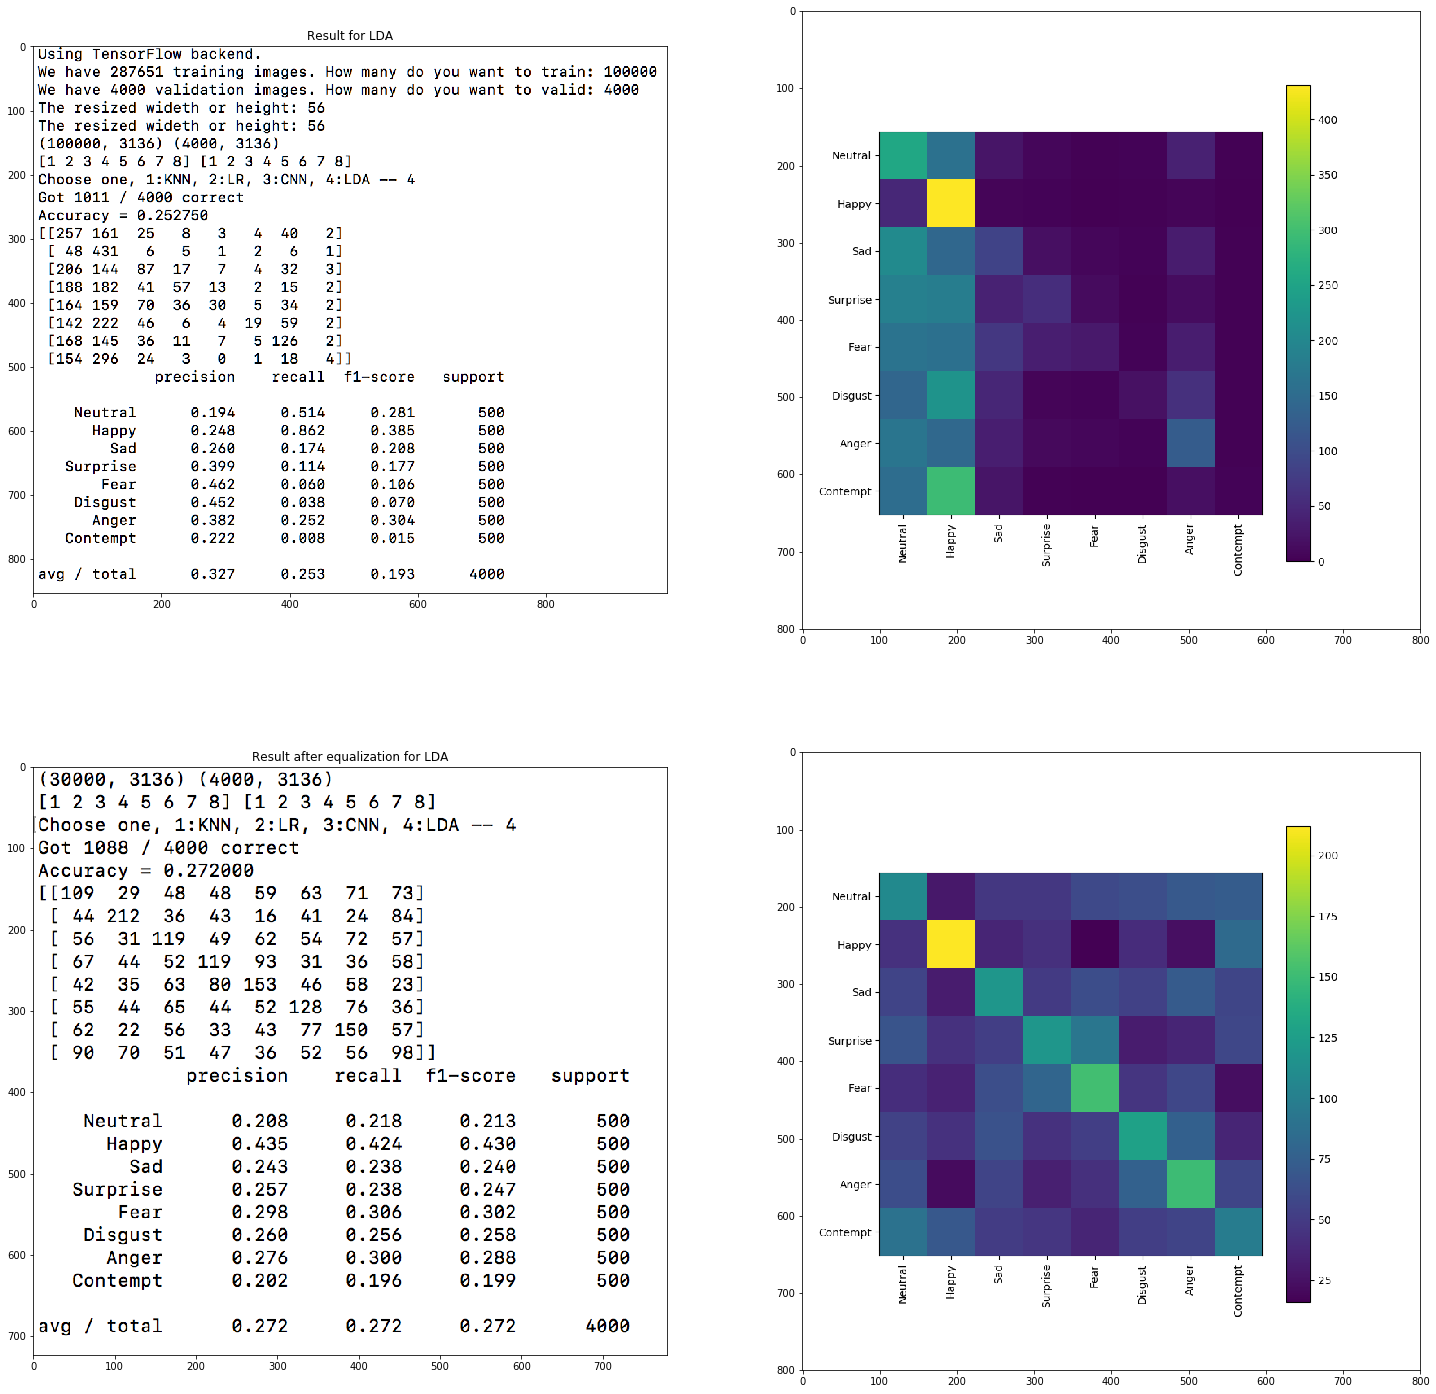

In [7]:
lda1 = cv2.imread('./LDA.png')
lda2 = mpimg.imread('plot_lda1.png')
lda3 = mpimg.imread('LDA2.png')
lda4 = mpimg.imread('plot_lda2.png')
plt.figure(figsize=(25,25))
plt.subplot(221),plt.imshow(lda1)
plt.title('Result for LDA')
plt.subplot(222),plt.imshow(lda2)
plt.subplot(223),plt.imshow(lda3)
plt.title('Result after equalization for LDA')
plt.subplot(224),plt.imshow(lda4)

# Discussion

1: the training set is 280000, the validation set is 4000.
Based on the above results, the performance rank is Mobilenet v2(38.47%) > KNN(36.8%) > LDA(32.7%).

Model Mobilenet v2 has the best performance with the accuracy of 38.47%, LDA is the worst one with the accuracy of 32.7%.

However, all of them have bad result. Hundreds of images are distributed to first two categories, Neutral and Happy. I think it is not due to the algorithms themselves, since I tried existing LDA package and still cannot get accuracy higher than 40%. What's more, I trained Mobilenet v2 many times, the training accuary looked great, which can be higher than 86%, however the validation accuracy is very weird, which always lower than 50%.

I changed coding method, tried many times, but nothing changes, hence I take it.

During the study, I usually meet the memory error due to the giant size of the dataset, I guess this perhaps can be one of the reason to get worse result.

Meanwhile, I notice that there are 75,374 Neutral images and 134,915 Happy images, which numbers are much more than the other categories. Perhaps, limiting the sample size of different categories may elevate the model performance.

Hence, I start to research with new idea.

2: the training set is 30000, the validation set is 4000.  
This time, based on the above results, the performance rank is Mobilenet v2(33.0%) > LDA(27.2%) > KNN(21.7%).

Model Mobilenet v2 has the best performance with the accuracy of 33.0%, KNN is the worst one with the accuracy of 21.7%.

The result is even worse, however, the distribution of confusion matrix is more equalized and more reasonable. This means that too much images number for Neutral and Happy category will be bias to prediction result. 

Therefore, we believe that model performs better if we increase the number of training images for each category and we balance the proportion of any two categories as 1:1.

# Future Work

Firstly, I read affectNet paper and find that many researchers use dimension model of affect to do facial recognition, which really broad my mind. And next step, I am going to use this idea to train the model and try to elevate the prediction result.

Secondly, in the future, we try to collect more data for each category and let each category have the same number. Then, the whole performance may be improved.

Thirdly, in the future, we are going to design an intelligent greeting software based on this model. The software will turn on the camera, capture your face and recognize your emotion, then feedback an encourage word based on your emotion. It will be a very vivid and meaningful software, which can relief current people's pressure.


# Appendix


In [0]:
################
# Load Package #
################
from __future__ import absolute_import,division,print_function,unicode_literals
import numpy as np
import pandas as pd
import tensorflow as tf
from numpy.linalg import *
import matplotlib.pyplot as plt
plt.switch_backend('agg')
from keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.applications import VGG16
from keras.utils import to_categorical
from keras.layers.convolutional import *
import os, sys, cv2, random, sklearn, keras
from sklearn.preprocessing import StandardScaler
from keras.metrics import categorical_crossentropy
from sklearn.model_selection import train_test_split
from keras import callbacks, layers, optimizers, models 
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers.convolutional import Convolution2D,MaxPooling2D,ZeroPadding2D
from keras.layers import Input, Dense, Conv2D,Activation,GlobalAveragePooling2D
from keras.layers import Add, Reshape, DepthwiseConv2D, Dropout, Flatten
from keras.utils.vis_utils import plot_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

##################
# Load Data File #
##################
train_file = pd.read_csv('/home/user1/dataset/path_label/train_list.csv')
valid_file = pd.read_csv('/home/user1/dataset/path_label/valid_list.csv')

train_file = train_file.rename(columns = {"subDirectory+filePath": "filepath",
                                          "Expression":"label"})
valid_file = valid_file.rename(columns = {"subDirectory+filePath": "filepath",
                                          "Expression":"label"})

ttl_data1 = train_file[train_file.label < 9][['filepath','label']]
ttl_data2 = valid_file[valid_file.label < 9][['filepath','label']]
for i in range(8):
    print(len(train_file[train_file.label == i+1][['label']]))

jg1 = int(input("We have %d training images. How many do you want to train: "
                %(len(ttl_data1))))
#train_path = list(ttl_data1.filepath)[0:jg1]
#train_label = ttl_data1.label[0:jg1]
jg2 = int(input("We have %d validation images. How many do you want to valid: "
                %(len(ttl_data2))))
valid_path = list(ttl_data2.filepath)[0:jg2]
valid_label = ttl_data2.label[0:jg2]

NUM = int(input("The image number used in each category: "))
train_path = []
train_label = []
cnt1,cnt2,cnt3,cnt4,cnt5,cnt6,cnt7,cnt8 = 0,0,0,0,0,0,0,0
for i in range(len(train_file)):
    if train_file.label[i] == 1:
        if cnt1 < NUM:
            train_path.append(train_file.filepath[i])
            train_label.append(train_file.label[i])
            cnt1 +=1
    elif train_file.label[i] == 2:
        if cnt2 < NUM:
            train_path.append(train_file.filepath[i])
            train_label.append(train_file.label[i])
            cnt2 +=1
    elif train_file.label[i] == 3:
        if cnt3 < NUM:
            train_path.append(train_file.filepath[i])
            train_label.append(train_file.label[i])
            cnt3 +=1
    elif train_file.label[i] == 4:
        if cnt4 < NUM:
            train_path.append(train_file.filepath[i])
            train_label.append(train_file.label[i])
            cnt4 +=1
    elif train_file.label[i] == 5:
        if cnt5 < NUM:
            train_path.append(train_file.filepath[i])
            train_label.append(train_file.label[i])
            cnt5 +=1
    elif train_file.label[i] == 6:
        if cnt6 < NUM:
            train_path.append(train_file.filepath[i])
            train_label.append(train_file.label[i])
            cnt6 +=1
    elif train_file.label[i] == 7:
        if cnt7 < NUM:
            train_path.append(train_file.filepath[i])
            train_label.append(train_file.label[i])
            cnt7 +=1
    elif train_file.label[i] == 8: 
        if cnt8 < NUM:
            train_path.append(train_file.filepath[i])
            train_label.append(train_file.label[i])
            cnt8 +=1
    else: pass

y_train, y_valid = list(train_label), list(valid_label)

def load_img(path_list):
    num = len(path_list)
    wh = int(input("The resized wideth or height: "))
    emptyset = np.zeros((len(path_list), wh*wh))
    step1 = "/home/user1/dataset/imageset"
    for i in range(len(path_list)):
        step2 = [step1, path_list[i]]
        pwd='/'.join(step2)
        getimg = cv2.imread(pwd)
        gray_img = cv2.cvtColor(getimg, cv2.COLOR_BGR2GRAY)
        dim = (wh, wh)
        gra_img = cv2.resize(gray_img, dim, interpolation = cv2.INTER_NEAREST)
        flat_img = np.reshape(gra_img,(1,wh*wh))
        emptyset[i] = np.float32(flat_img)/255.

    return emptyset, num

x_train, train_num = load_img(train_path)
x_valid, valid_num = load_img(valid_path)
print(np.shape(x_train),np.shape(x_valid))

x_test, y_test = x_valid, y_valid
print(np.unique(y_train), np.unique(y_test))

label_dict = {1: 'Neutral',2: 'Happy', 3: 'Sad', 4: 'Surprise', 5: 'Fear',
              6: 'Disgust', 7: 'Anger', 8: 'Contempt'}

words = ["No fluctuation in your heart.",
         "Why do you smell as beautiful as flowers?",
         "There will be sunshine after raining.",
         "Tell me more about your new discoverary.",
         "Be brave, we all stand behind you.",
         "Things will change if you view it from another side.",
         "You loss when you are serious.",
         "Anybody worths respect.",]

############## 
# Class Part #
############## 
# Build PCA Class
class SJPCA(object):
    def __init__(self):
        pass

    def train(self, X):
        self.x_train = X

    def compute_mean_covar_eigen(self):
        # get average image and get mean image by summing each row
        tr_mean = np.mean(self.x_train, axis=0)
        tr_mean = np.reshape(tr_mean,(1,np.shape(tr_mean)[0]))

        # subtract the mean
        xtr_m = self.x_train - tr_mean
        # calculate covariance matrix
        tr_cov = np.dot(xtr_m.T,xtr_m)
        # get eigenvalue and eigenvector
        tr_val, tr_vec = eig(tr_cov)
        return xtr_m, tr_cov, tr_val, tr_vec

    def get_comp_K(self,tr_val, threshold):
        cum_lambda = np.cumsum(tr_val)
        total_lamda = cum_lambda[-1]

        # get the principal component number that we want to keep
        for keep_dim in range(len(tr_val)):
            rate = cum_lambda[keep_dim]/total_lamda
            if rate >= threshold:
                return keep_dim
                break
            else: continue

    def deduct_img(self, xtr_m, tr_vec, keep_dim):
        x_proj= np.dot(xtr_m, tr_vec.T[:,0:keep_dim])
        return x_proj

# Build KNN Class
class SJKNN(object):
    def __init__(self):
        pass

    def train(self, X, Y):
    # the nearest neighbor classifier simply remembers all the training data
        self.X_train = X
        self.Y_train = Y

    def compute_distances_no_loops(self, X_test):
        num_test = np.shape(X_test)[0]
        num_train = np.shape(self.X_train)[0]
        dists = np.zeros((num_test, num_train))
        dists = np.sqrt(self.getNormMatrix(X_test, num_train).T +
                        self.getNormMatrix(self.X_train, num_test) -
                        2 * np.dot(X_test, self.X_train.T))
        pass
        return(dists)
    
    def getNormMatrix(self, x, lines_num):
        return(np.ones((lines_num, 1)) * np.sum(np.square(x), axis = 1))

    def predict_labels(self, dists, k):
        num_test = np.shape(dists)[0]
        Y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = []
            kids = np.argsort(dists[i])
            #print(kids)
            closest_y = np.array(self.Y_train)[kids[:k]]
            count = 0
            label = 0
            for j in closest_y:
                tmp = 0
                for kk in closest_y:
                    tmp += (kk == j)
                if tmp > count:
                    count = tmp
                    label = j
            Y_pred[i] = label
        return Y_pred

    def predict(self, X_test, k):
        num_test = X_test.shape[0]
        # lets make sure that the output type matches the input type
        #ypred = np.zeros(num_test, dtype = self.Y_train.dtype)
        ypred = np.zeros(num_test)
        dists = self.compute_distances_no_loops(X_test)
        return self.predict_labels(dists, k=k)

# Build LR Class
class SJLogis_Regre(object):
    def __init__(self):
        pass

    def train(self, X, Y):
        self.x_train = X
        self.y_train = Y

    def split_category1(self, category_name):
        yy_train=[]
        for i in range(len(y_train)):
            if (self.y_train[i]==category_name):
                yy_train.append(1)
            else: yy_train.append(0)
        return yy_train

    def sigmoid(self, a):
        return 1 / (1 + np.exp(-a))

    def log_likelihood1(self, ytrain_c, weight):

        # add intercept
        intercept = np.ones((np.shape(self.x_train)[0], 1))
        xtrain_c = np.hstack((intercept, self.x_train))

        weight = np.reshape(weight,(np.shape(xtrain_c)[1], 1))
        a = np.dot(xtrain_c, weight)

        ll = np.sum( np.multiply(ytrain_c,a.T) - np.log(1+np.exp(a.T)) )
        return ll

    def gradient_descent1(self, ytrain_c, learning_rate, iteration_time):

        # add intercept
        intercept = np.ones((np.shape(self.x_train)[0], 1))
        xtrain_c = np.hstack((intercept, self.x_train))

        # initial weight
        weight = np.zeros((1,np.shape(xtrain_c)[1]))
        ytrain_c = np.reshape(ytrain_c,(1, np.shape(ytrain_c)[0]))

        # do iteration
        for i in range(iteration_time):
            a = np.dot(weight, xtrain_c.T)
            pred = self.sigmoid(a)

            diff = ytrain_c - pred

            gradient = np.dot(diff, xtrain_c)
            weight = weight + learning_rate * gradient

            # Print the cost
            if (i % 10000 == 0):
                cost = -self.log_likelihood1(ytrain_c, weight)

                print ("the cost in %d step is %3f" %(i,cost))

        return weight

    def get_pcx(self, xtest_c, weight_c):

        add_intercept = np.hstack((1, xtest_c))

        p_c = np.dot(weight_c,add_intercept)
        result_c = self.sigmoid(p_c)
        return result_c

    def predict_c(self, total_result):
        value = np.where(total_result == np.max(total_result))
        return value[0][0]


choose_method = input("Choose one, 1:KNN, 2:LR, 3:CNN, 4:LDA -- ")
if (int(choose_method)==1 or int(choose_method)== 2):
#######################
# Dimension Reduction #
#######################
    # stack train and valid as a big one for dimension deduction
    big_X=np.vstack((x_train,x_test))
    SJ = SJPCA()
    SJ.train(big_X)
    xtr_m, tr_cov, tr_val, tr_vec = SJ.compute_mean_covar_eigen()
    threshold_pca = input("The percentage that you want to keep: ")
    keep_dim = SJ.get_comp_K(tr_val, float(threshold_pca))
    new_big_X = SJ.deduct_img(xtr_m, tr_vec, keep_dim)
    print("The kept dimension is",keep_dim)

    # resplit the dataset and normalize them with min-max normalization
    x_train = new_big_X[0:train_num,:]
    x_test = new_big_X[train_num:train_num+valid_num,:]
    tr_min = np.min(x_train,axis=1)
    tr_cha = np.max(x_train,axis=1)-np.min(x_train,axis=1)
    te_min = np.min(x_test,axis=1)
    te_cha = np.max(x_test,axis=1)-np.min(x_test,axis=1)
    for i in range(train_num):
        x_train[i]=(x_train[i]-tr_min[i])/tr_cha[i]
    for j in range(valid_num):
        x_test[j]=(x_test[j]-te_min[j])/te_cha[j]

###########
# Try KNN #
###########
    if (int(choose_method)==1):
        # select best k
        K = []
        n = int(input("Enter number of K: "))
        for lst in range(0, n):
            ele = int(input())
            K.append(ele) # adding the element     

        SJ = SJKNN()
        SJ.train(x_train, y_train)
        num_test = len(y_test)
        Acc_lst = []
        for k_value in K:
            Y_test_pred = SJ.predict(x_test, k=k_value)
            num_correct = np.sum(Y_test_pred == y_test)
            print('Got %d / %d correct' % (num_correct, num_test))
            k_acc=np.mean(y_test == Y_test_pred)
            Acc_lst.append(k_acc)
            print('k = %s, Accuracy = %4f' % (k_value, k_acc))

        bestk = K[np.where(Acc_lst==np.max(Acc_lst))[0][0]]

        Y_test_pred=SJ.predict(x_test, k=bestk)
        num_correct = np.sum(Y_test_pred == y_test)
        print('Got %d / %d correct' % (num_correct, num_test))
        print('k = %s, Accuracy = %f' % (bestk, np.mean(y_test == Y_test_pred)))
        print(confusion_matrix(y_test, Y_test_pred))
        print(classification_report(y_test, Y_test_pred,
              target_names=list(label_dict.values()),digits=3))
        plt.figure(figsize=(8,8))
        cnf_matrix = confusion_matrix(y_test, Y_test_pred)
        classes = list(label_dict.values())
        plt.imshow(cnf_matrix, interpolation='nearest')
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        _ = plt.xticks(tick_marks, classes, rotation=90)
        _ = plt.yticks(tick_marks, classes)
        plt.savefig('plot_knn.png')

        yc=Y_test_pred[0]
        words[int(yc)]

##########
# Try LR #
##########   
    else:
        # split the train as 10 categories
        JS = SJLogis_Regre()
        JS.train(x_train,y_train)
        y1_train = JS.split_category1(1)
        y2_train = JS.split_category1(2)
        y3_train = JS.split_category1(3)
        y4_train = JS.split_category1(4)
        y5_train = JS.split_category1(5)
        y6_train = JS.split_category1(6)
        y7_train = JS.split_category1(7)
        y8_train = JS.split_category1(8)
        
        import time
        # calculate weight seperately
        learning_rate = float(input("Please write down learning rate: "))
        iteration_time = int(input("Please write the iteration times: "))
        tic = time.time()
        w1 = JS.gradient_descent1(y1_train, learning_rate, iteration_time)
        w2 = JS.gradient_descent1(y2_train, learning_rate, iteration_time)
        w3 = JS.gradient_descent1(y3_train, learning_rate, iteration_time)
        w4 = JS.gradient_descent1(y4_train, learning_rate, iteration_time)
        w5 = JS.gradient_descent1(y5_train, learning_rate, iteration_time)
        w6 = JS.gradient_descent1(y6_train, learning_rate, iteration_time)
        w7 = JS.gradient_descent1(y7_train, learning_rate, iteration_time)
        w8 = JS.gradient_descent1(y8_train, learning_rate, iteration_time)
        toc = time.time()
        print('Iteration took %f seconds' %(toc - tic))

        # calculate probability for each category 
        y_pred = []
        for i in range(np.shape(x_test)[0]): 
            pred_1 = JS.get_pcx(x_test[i], w1)
            pred_2 = JS.get_pcx(x_test[i], w2)
            pred_3 = JS.get_pcx(x_test[i], w3)
            pred_4 = JS.get_pcx(x_test[i], w4)
            pred_5 = JS.get_pcx(x_test[i], w5)
            pred_6 = JS.get_pcx(x_test[i], w6)
            pred_7 = JS.get_pcx(x_test[i], w7)
            pred_8 = JS.get_pcx(x_test[i], w8)

            pred = [pred_1[0],pred_2[0],pred_3[0],pred_4[0],
                    pred_5[0],pred_6[0],pred_7[0],pred_8[0]]
            value = JS.predict_c(pred)
            y_pred.append(value)
        # calculate accuracy
        num_test = len(y_test)
        num_correct = np.sum(y_pred == y_test)
        print('Got %d / %d correct' % (num_correct, num_test))
        print('Accuracy = %3f' % (np.mean(y_test == y_pred)))
        print(confusion_matrix(y_test, y_pred)) 
        print(classification_report(y_test, y_pred,
              target_names=list(label_dict.values()),digits=3))
        plt.figure(figsize=(8,8))
        cnf_matrix = confusion_matrix(y_test, y_pred)
        classes = list(label_dict.values())
        plt.imshow(cnf_matrix, interpolation='nearest')
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        _ = plt.xticks(tick_marks, classes, rotation=90)
        _ = plt.yticks(tick_marks, classes)
        plt.savefig('plot_lr.png')

        pred_1 = JS.get_pcx(smp_img, w1)
        pred_2 = JS.get_pcx(smp_img, w2)
        pred_3 = JS.get_pcx(smp_img, w3)
        pred_4 = JS.get_pcx(smp_img, w4)
        pred_5 = JS.get_pcx(smp_img, w5)
        pred_6 = JS.get_pcx(smp_img, w6)
        pred_7 = JS.get_pcx(smp_img, w7)
        pred_8 = JS.get_pcx(smp_img, w8)

        value = y_pred[0]
        words[int(value)]


###########
# Try CNN #
###########
elif (int(choose_method)==3):
    from keras import backend as K

    def _make_divisible(v, divisor, min_value=None):
        if min_value is None:
            min_value = divisor
        new_v = max(min_value, int(v + divisor / 2) // divisor * divisor)
        # Make sure that round down does not go down by more than 10%.
        if new_v < 0.9 * v:
            new_v += divisor
        return new_v

    def relu6(x):
        return K.relu(x, max_value=6.0)

    def _conv_block(inputs, filters, kernel, strides):

        channel_axis = 1 if K.image_data_format() == 'channels_first' else -1

        x = Conv2D(filters, kernel, padding='same', strides=strides)(inputs)
        x = BatchNormalization(axis=channel_axis)(x)
        return Activation(relu6)(x)

    def _bottleneck(inputs, filters, kernel, t, alpha, s, r=False):

        channel_axis = 1 if K.image_data_format() == 'channels_first' else -1
        # Depth
        tchannel = K.int_shape(inputs)[channel_axis] * t
        # Width
        cchannel = int(filters * alpha)

        x = _conv_block(inputs, tchannel, (1, 1), (1, 1))

        x = DepthwiseConv2D(kernel, strides=(s, s), depth_multiplier=1,
                            padding='same')(x)
        x = BatchNormalization(axis=channel_axis)(x)
        x = Activation(relu6)(x)

        x = Conv2D(cchannel, (1, 1), strides=(1, 1), padding='same')(x)
        x = BatchNormalization(axis=channel_axis)(x)

        if r:
            x = Add()([x, inputs])

        return x


    def _inverted_residual_block(inputs, filters, kernel, t, alpha, strides, n):

        x = _bottleneck(inputs, filters, kernel, t, alpha, strides)

        for i in range(1, n):
            x = _bottleneck(x, filters, kernel, t, alpha, 1, True)

        return x

    def MobileNetv2(input_shape, k, alpha=1.0):
        inputs = Input(shape=input_shape)

        first_filters = _make_divisible(32 * alpha, 8)
        x = _conv_block(inputs, first_filters, (3, 3), strides=(2, 2))

        x= _inverted_residual_block(x,16,(3, 3),t=1,alpha=alpha,strides=1,n=1)
        x= _inverted_residual_block(x,24,(3, 3),t=6,alpha=alpha,strides=2,n=2)
        x= _inverted_residual_block(x,32,(3, 3),t=6,alpha=alpha,strides=2,n=3)
        x= _inverted_residual_block(x,64,(3, 3),t=6,alpha=alpha,strides=2,n=4)
        x= _inverted_residual_block(x,96,(3, 3),t=6,alpha=alpha,strides=1,n=3)
        x= _inverted_residual_block(x,160,(3, 3),t=6,alpha=alpha,strides=2,n=3)
        x= _inverted_residual_block(x,320,(3, 3),t=6,alpha=alpha,strides=1,n=1)

        if alpha > 1.0:
            last_filters = _make_divisible(1280 * alpha, 8)
        else:
            last_filters = 1280

        x = _conv_block(x, last_filters, (1, 1), strides=(1, 1))
        x = GlobalAveragePooling2D()(x)
        x = Reshape((1, 1, last_filters))(x)
        x = Dropout(0.3, name='Dropout')(x)
        x = Conv2D(k, (1, 1), padding='same')(x)

        x = Activation('softmax', name='softmax')(x)
        output = Reshape((k,))(x)

        model = Model(inputs, output)
        # plot_model(model, to_file='images/MobileNetv2.png', show_shapes=True)
        return model

    y_train_labels = to_categorical(y_train)
    y_train_labels = np.delete(y_train_labels,[0],1)
    y_test_labels = to_categorical(y_test)
    y_test_labels = np.delete(y_test_labels,[0],1)
    print(np.shape(y_train_labels),np.shape(y_test_labels))
    # Convert the images into 3 channels 
    X_train=np.dstack([x_train] * 3) 
    X_test=np.dstack([x_test] * 3) 
    print("The shape of new train: ",np.shape(X_train), 
          ",The shape of new test: ",np.shape(X_test))
    # Reshape images as per the tensor format required by tensorflow 
    wh = int(input("input the size again: "))
    X_train = X_train.reshape(-1,wh,wh,3)
    X_test = X_test.reshape (-1,wh,wh,3)
    print("The shape of new train: ",np.shape(X_train), 
          ",The shape of new test: ",np.shape(X_test))

    # Define the parameters for instanitaing model
    IMG_WIDTH = int(input("The image width is: "))
    IMG_HEIGHT = int(input("The image height is: "))
    IMG_DEPTH = int(input("The image layers is: "))
    BATCH_SIZE = int(input("The number for each batch is: "))

    if __name__ == '__main__':
        model = MobileNetv2((IMG_WIDTH, IMG_HEIGHT, IMG_DEPTH), 8, 1.0)
        print(model.summary())

        NB_EPOCHS = int(input("The epoach number is: "))
    
        from keras import models
        from keras.models import Model
        from keras import optimizers
        from keras import callbacks
        # Compile the model.
        model.compile(Adam(lr=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

        # Incorporating reduced learning and early stopping for callback
        reduce_learning = callbacks.ReduceLROnPlateau(
            monitor='val_loss', factor=0.2, patience=2,
            verbose=1, mode='auto', epsilon=0.0001,
            cooldown=2, min_lr=0)

        eary_stopping = callbacks.EarlyStopping(
            monitor='val_loss', min_delta=0.00002,
            patience=7, verbose=1,
            mode='auto')

        callbacks = [reduce_learning, eary_stopping]
        # Train the the model
        model.load_weights('cnn_weight.h5')
        mt=model.fit(X_train, y_train_labels,
            batch_size=16, epochs=NB_EPOCHS,
            verbose=2, callbacks=callbacks,
            validation_data=(X_test, y_test_labels)
            )
        model.save_weights('cnn_weight.h5') 
        # Evaluate accuracy
        test_loss, test_acc = model.evaluate(X_test, y_test_labels)
        print('Test Accuracy:%4f, Test Loss:%4f.' %(test_acc,test_loss))   
        
        y_test = np.argmax(y_test_labels, axis=1)
        # Make Prediction
        pred_result = model.predict(X_test)
        y_pred=[]
        for i in range(np.shape(y_test)[0]):
            num = np.where(pred_result[i]==max(pred_result[i]))
            y_pred.append(num[0][0])
        y_pred = np.transpose(y_pred)
        # calculate accuracy
        num_test = len(y_test)
        num_correct = np.sum(y_pred == y_test)
        print('Got %d / %d correct' % (num_correct, num_test))
        print('Accuracy = %f' % (np.mean(y_test == y_pred)))
        print(confusion_matrix(y_test, y_pred)) 
        print(classification_report(y_test, y_pred,
              target_names=list(label_dict.values()),digits=3))
        plt.figure(figsize=(8,8))
        cnf_matrix = confusion_matrix(y_test, y_pred)
        classes = list(label_dict.values())
        plt.imshow(cnf_matrix, interpolation='nearest')
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        _ = plt.xticks(tick_marks, classes, rotation=90)
        _ = plt.yticks(tick_marks, classes)
        plt.savefig('plot_cnn.png')
        
        yc=y_pred[0]
        words[int(yc)]
    
elif (int(choose_method)==4):
    
    # scaling
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    #creating a LDA object
    lda = LDA(n_components=2)
    lda.fit_transform(x_train, y_train) #learning the projection matrix
    y_pred = lda.predict(x_test) #gives you the predicted label for each sample
    y_prob = lda.predict_proba(x_test)
    
    num_test = len(y_test)
    num_correct = np.sum(y_pred == y_test)
    print('Got %d / %d correct' % (num_correct, num_test))
    print('Accuracy = %f' % (np.mean(y_test == y_pred)))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred,
          target_names=list(label_dict.values()),digits=3))
    plt.figure(figsize=(8,8))
    cnf_matrix = confusion_matrix(y_test, y_pred)
    classes = list(label_dict.values())
    plt.imshow(cnf_matrix, interpolation='nearest')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    _ = plt.xticks(tick_marks, classes, rotation=90)
    _ = plt.yticks(tick_marks, classes)
    plt.savefig('plot_lda.png')
    
    yc=y_pred[0]
    words[int(yc)]

else: print("Wrong Input. Please try 1,2,3,4")

